In [9]:
import cv2
import mmcv
from mmcv.transforms import Compose
from mmengine.utils import track_iter_progress
from mmdet.registry import VISUALIZERS
from mmdet.apis import init_detector, inference_detector
from matplotlib import pyplot as plt

In [3]:

# Specify the path to model config and checkpoint file
config_file = '/home/ec2-user/mmdetection/configs/cascade_rcnn/custom_cascade_rcnn.py'
checkpoint_file = '/home/ec2-user/mmdetection/models_run_fold_3/model_run_fold_3_fold_3_0.191.pth'

# Build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Init visualizer
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# The dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

# Test a single image and show the results
img = '/home/ec2-user/hubmap-hacking-the-human-vasculature/dataset1_files/all_dataset1_mmdet_fold_3/validation_images/0033bbc76b6b.tif'  # or img = mmcv.imread(img), which will only load it once
result = inference_detector(model, img)

# Show the results
img = mmcv.imread(img)
img = mmcv.imconvert(img, 'bgr', 'rgb')

Loads checkpoint by local backend from path: /home/ec2-user/mmdetection/models_run_fold_3/model_run_fold_3_fold_3_0.191.pth
07/03 08:03:13 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


/home/ec2-user/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


In [21]:
print(result.pred_instances.bboxes)
print(result.pred_instances.masks)

tensor([[1.4253e+02, 1.4478e+02, 1.7904e+02, 2.3131e+02],
        [5.9752e-01, 3.9931e+02, 1.4782e+01, 4.6644e+02],
        [3.1884e+00, 2.7283e+02, 6.7743e+01, 3.6206e+02],
        [3.7002e+02, 4.9713e+02, 4.0347e+02, 5.1050e+02],
        [1.9160e+01, 2.1990e+02, 7.4753e+01, 2.7654e+02],
        [1.9017e+01, 2.1999e+02, 7.4890e+01, 2.7658e+02],
        [4.8194e+02, 1.9016e+00, 5.1200e+02, 4.2643e+01],
        [8.2226e+01, 1.0613e+01, 1.5919e+02, 1.3172e+02],
        [4.9707e-03, 3.5296e+02, 1.3041e+01, 3.9186e+02],
        [3.1884e+00, 2.7283e+02, 6.7743e+01, 3.6206e+02],
        [4.8194e+02, 1.9016e+00, 5.1200e+02, 4.2643e+01],
        [8.3268e+01, 1.0860e+01, 1.5751e+02, 1.3226e+02],
        [2.6557e+01, 7.9684e+01, 1.0125e+02, 1.9702e+02],
        [4.6052e+02, 2.8324e+02, 5.0188e+02, 3.2320e+02],
        [5.0767e-02, 1.7958e+02, 1.6654e+01, 2.0354e+02],
        [3.6988e+02, 4.9692e+02, 4.0372e+02, 5.1073e+02],
        [3.6518e+02, 4.7598e+02, 4.0439e+02, 5.1162e+02],
        [2.323

In [5]:
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    show=True)

/home/ec2-user/anaconda3/envs/mmdet/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:757: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(
/home/ec2-user/anaconda3/envs/mmdet/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:828: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(


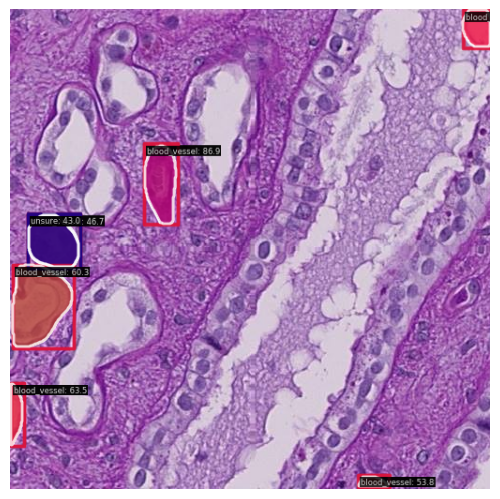

In [6]:
visualizer.show()

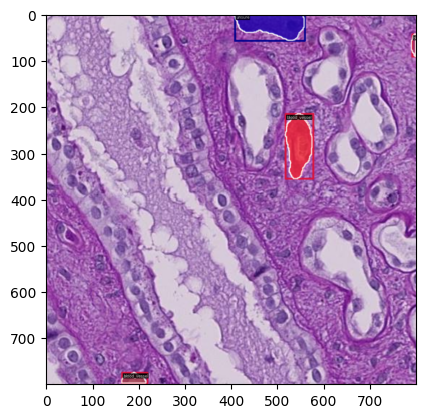

In [10]:
origimg = cv2.imread('/home/ec2-user/mmdetection/visualizer_disp_results/0033bbc76b6b.tif')
origimg = cv2.cvtColor(origimg, cv2.COLOR_BGR2RGB)

# Plot the image using Matplotlib
plt.imshow(origimg)